# `51-Logistic Regression Titanic`

# 1. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Get the Data

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.1 Data Preprocessing

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### 2.1.1 Remove Unnecessary Columns

In [11]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

##### 2.1.2 Converting Categorical Features

In [13]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [14]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [15]:
train = pd.concat([train, sex, embark], axis=1)

In [16]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,True,False,True
1,1,1,38.0,1,0,71.2833,C85,False,False,False
2,1,3,26.0,0,0,7.9250,NaN,False,False,True
3,1,1,35.0,1,0,53.1000,C123,False,False,True
4,0,3,35.0,0,0,8.0500,NaN,True,False,True


##### 2.1.3 Removing Nulls

<Axes: >

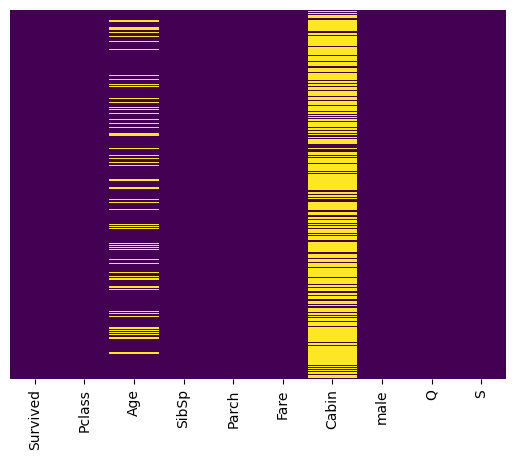

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [19]:
#Drop Null Column

In [20]:
train.drop('Cabin', axis=1, inplace=True)

In [21]:
# Data Filling

<Axes: xlabel='Pclass', ylabel='Age'>

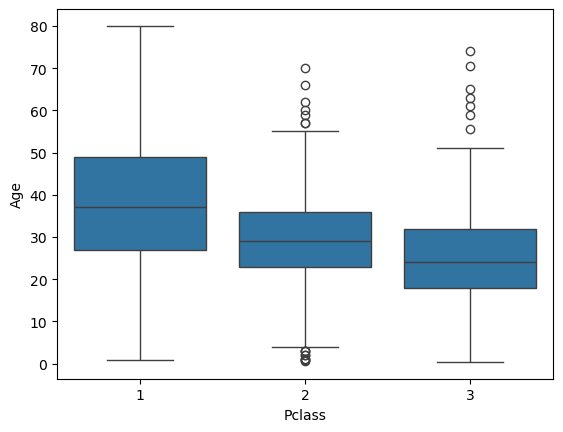

In [22]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [23]:
def set_age(mat):
    Age = mat.iloc[0]
    Pclass = mat.iloc[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [24]:
train['Age'] = train[['Age', 'Pclass']].apply(set_age, axis=1)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


# 3. Exploring Data Insights

In [27]:
sns.set_palette("rainbow")
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

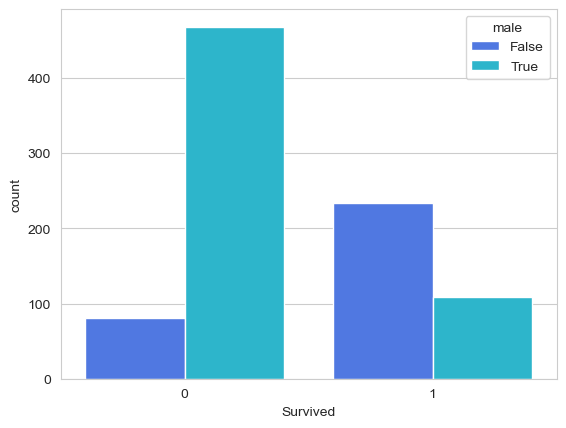

In [29]:
sns.countplot(x='Survived', hue='male', data=train)

<Axes: >

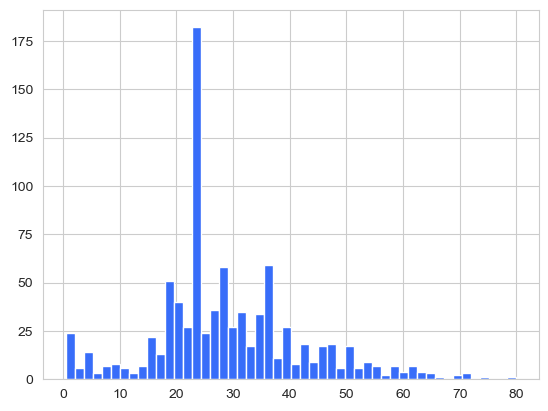

In [78]:
train['Age'].hist(bins=50)

# 4. Training and Testing Data

In [38]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [44]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [45]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

### Training Model

In [53]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = model.predict(X_test)

# 5. Evaluating Model

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [63]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.7611940298507462

Confusion Matrix:
 [[141  23]
 [ 41  63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.82       164
           1       0.73      0.61      0.66       104

    accuracy                           0.76       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.76      0.76      0.76       268



# 6. Predict New Data

In [69]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [72]:
new_passenger = pd.DataFrame([{
    'Pclass': 3,
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'male': 1,
    'Q': 0,
    'S': 0
}])

prediction = model.predict(new_passenger)
print("Predicted Survival:", "Survived" if prediction[0] == 1 else "Did not survive")

Predicted Survival: Did not survive
